In [ ]:
# basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("MovieCopy.csv")
print("The shape of the df is {}".format(df.shape))

The shape of the df is (2615, 25)


In [ ]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [ ]:
df.head()

,Actors1,Actors2,Actors3,Actors4,Actors5,Actors6,Actors7,Budget,Dialogue,Director,First_Day,First_Week,First_Weekend,Genre,India_Gross,Lyrics,Music,Producer,Production_Banner,Release_Date,Runtime,Screenplay,Screens,Story,Title
0,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,Sachin Khedekar,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,813700000,457400000,Action,1639800000,Amitabh Bhattacharya,Ajay - Atul,"Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,2012-01-26,168,NaN,2600,Piyush Mishra,Agneepath
1,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,NaN,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,19550000,12800000,Love Story,27200000,"Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,2012-04-13,130,Supavitra Babul,675,Gautam Mehra,Bittoo Boss
2,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,Riteish Deshmukh,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,617500000,402400000,Comedy,1537600000,Sameer,Sajid - Wajid,Sajid Nadiadwala,Eros International,2012-04-06,156,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2
3,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,Ashok Saraf,410000000,Yunus Sajawal,Rohit Shetty,87600000,492900000,297300000,Action,1358300000,Swanand Kirkire,Ajay - Atul,NaN,Reliance Entertainment,2011-07-22,144,Hari,2050,Farhad - Sajid,Singham
4,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,Kunal Khemu,500000000,Yunus Sajawal,Rohit Shetty,83600000,626100000,348500000,Comedy,1491200000,Kumaar,Pritam,Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,141,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3


In [ ]:
df.dtypes

Actors1                      object
Actors2                      object
Actors3                      object
Actors4                      object
Actors5                      object
Actors6                      object
Actors7                      object
Budget                        int64
Dialogue                     object
Director                     object
First_Day                    object
First_Week                   object
First_Weekend                object
Genre                        object
India_Gross                   int64
Lyrics                       object
Music                        object
Producer                     object
Production_Banner            object
Release_Date         datetime64[ns]
Runtime                       int64
Screenplay                   object
Screens                       int64
Story                        object
Title                        object
dtype: object

In [ ]:
print (df.isnull().sum())

Actors1               21
Actors2              406
Actors3              489
Actors4              540
Actors5              642
Actors6              773
Budget                 0
Dialogue             162
Director              30
First_Day            625
First_Week           469
First_Weekend        625
Genre                  3
India_Gross            0
Lyrics               388
Music                110
Producer             274
Production_Banner      7
Release_Date           0
Runtime                0
Screenplay           260
Screens                0
Story                204
Title                  0
profit                 0
dtype: int64


In [ ]:
# create a list of our conditions
conditions = [
    df['India_Gross'] > 1.5*df['Budget'],
    (df['India_Gross'] < 1.5*df['Budget']) & (df['India_Gross'] > df['Budget']),
    df['India_Gross'] < df['Budget'] 
    ]

# create a list of the values we want to assign for each condition
values = ['hit','avg','flop']

# create a new column and use np.select to assign values to it using our lists as arguments
df['profit'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Actors1,Actors2,Actors3,Actors4,Actors5,Actors6,Actors7,Budget,Dialogue,Director,First_Day,First_Week,First_Weekend,Genre,India_Gross,Lyrics,Music,Producer,Production_Banner,Release_Date,Runtime,Screenplay,Screens,Story,Title,profit
0,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,Sachin Khedekar,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,813700000,457400000,Action,1639800000,Amitabh Bhattacharya,Ajay - Atul,"Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,2012-01-26,168,NaN,2600,Piyush Mishra,Agneepath,hit
1,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,NaN,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,19550000,12800000,Love Story,27200000,"Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,2012-04-13,130,Supavitra Babul,675,Gautam Mehra,Bittoo Boss,flop
2,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,Riteish Deshmukh,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,617500000,402400000,Comedy,1537600000,Sameer,Sajid - Wajid,Sajid Nadiadwala,Eros International,2012-04-06,156,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2,hit
3,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,Ashok Saraf,410000000,Yunus Sajawal,Rohit Shetty,87600000,492900000,297300000,Action,1358300000,Swanand Kirkire,Ajay - Atul,NaN,Reliance Entertainment,2011-07-22,144,Hari,2050,Farhad - Sajid,Singham,hit
4,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,Kunal Khemu,500000000,Yunus Sajawal,Rohit Shetty,83600000,626100000,348500000,Comedy,1491200000,Kumaar,Pritam,Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,141,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3,hit


In [ ]:
df['profit'].value_counts()

flop    1893
hit      406
avg      316
Name: profit, dtype: int64

In [ ]:
df[['First_Day','First_Week','First_Weekend']] = df[['First_Day','First_Week','First_Weekend']].replace('--',np.NAN)

In [ ]:
df.drop(['Actors7'], axis=1, inplace=True)

In [ ]:
df.replace(r'\s+( +\.)|#',np.NAN,regex=True)

,Actors1,Actors2,Actors3,Actors4,Actors5,Actors6,Budget,Dialogue,Director,First_Day,First_Week,First_Weekend,Genre,India_Gross,Lyrics,Music,Producer,Production_Banner,Release_Date,Runtime,Screenplay,Screens,Story,Title,profit
0,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,813700000,457400000,Action,1639800000,Amitabh Bhattacharya,Ajay - Atul,"Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,2012-01-26,168,NaN,2600,Piyush Mishra,Agneepath,hit
1,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,19550000,12800000,Love Story,27200000,"Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,2012-04-13,130,Supavitra Babul,675,Gautam Mehra,Bittoo Boss,flop
2,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,617500000,402400000,Comedy,1537600000,Sameer,Sajid - Wajid,Sajid Nadiadwala,Eros International,2012-04-06,156,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2,hit
3,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,410000000,Yunus Sajawal,Rohit Shetty,87600000,492900000,297300000,Action,1358300000,Swanand Kirkire,Ajay - Atul,NaN,Reliance Entertainment,2011-07-22,144,Hari,2050,Farhad - Sajid,Singham,hit
4,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,500000000,Yunus Sajawal,Rohit Shetty,83600000,626100000,348500000,Comedy,1491200000,Kumaar,Pritam,Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,141,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3,hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,Ayushman Khurana,Sanya Malhotra,Gajraj Rao,Neena Gupta,Surekha Sikri,Shardul Rana,290000000,Akshat Ghildial,Amit Ravindernath Sharma,73000000,611700000,320000000,Comedy,490042500,"Kumaar,MellowD,Vayu","Tanishk,Kaushik - Akash,Inder Bawra,Sunny Bawr...","Vineet Jain,Hemant Bhandari,Aleya Sen,Amit Rav...",Chrome Pictures,2018-10-18,125,Akshat Ghildial,2000,"Akshat Ghildial,Shantanu Srivastava",Badhaai Ho,hit
2611,Arjun Kapoor,Parineeti Chopra,Aditya Seal,Anjum Batra,Alankrita Sahal,Satish Kaushik,540000000,"Suresh Nair,Ritesh Shah",Vipul Amrutlal Shah,16100000,74800000,48900000,Rom - Com,41752500,Javed Akhtar,"Mannan Shaah,Rishi Rich,Baadshah","Akshay Jayantilal Gada,Dhaval Gada,Vipul Amrut...",Blockbuster Movie Entertainers,2018-10-18,149,"Suresh Nair,Ritesh Shah",2100,"Suresh Nair,Suresh Nair",Namaste England,flop
2612,Saif Ali Khan,Chitrangda Singh,Radhika Apte,Rohan Vinod Mehra,Manish Chaudhary,Sonia Balani,340000000,Aseem Arora,Gauravv K. Chawla,28100000,164200000,107400000,Drama,70320000,"Honey Singh,Jalil Ahmed,Ikka,Bilal Saeed,Shabb...","Tanishk,Bilal Saeed,Kanika Kapoor,Honey Singh,...","Madhu Bhojwani,Monisha Advani,Sunil Shah,Ishan...",B4U Entertainment,2018-10-26,140,"Parvez Sheikh,Aseem Arora",1250,Parvez Sheikh,Baazaar,flop
2613,Amitabh Bachchan,Aamir Khan,Katrina Kaif,Fatima Sana Shaikh,Mohammed Zeeshan Ayyub,Ronit Roy,3100000000,Vijay Krishna Acharya,Vijay Krishna Acharya,482700000,1272900000,984500000,Masala,686575000,Amitabh Bhattacharya,Ajay - Atul,Aditya Chopra,Yash Raj Films,2018-11-08,165,Vijay Krishna Acharya,4700,Vijay Krishna Acharya,Thugs Of Hindostan,flop


In [ ]:
df.replace('',np.NAN)

,Actors1,Actors2,Actors3,Actors4,Actors5,Actors6,Budget,Dialogue,Director,First_Day,First_Week,First_Weekend,Genre,India_Gross,Lyrics,Music,Producer,Production_Banner,Release_Date,Runtime,Screenplay,Screens,Story,Title,profit
0,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,813700000,457400000,Action,1639800000,Amitabh Bhattacharya,Ajay - Atul,"Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,2012-01-26,168,NaN,2600,Piyush Mishra,Agneepath,hit
1,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,19550000,12800000,Love Story,27200000,"Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,2012-04-13,130,Supavitra Babul,675,Gautam Mehra,Bittoo Boss,flop
2,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,617500000,402400000,Comedy,1537600000,Sameer,Sajid - Wajid,Sajid Nadiadwala,Eros International,2012-04-06,156,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2,hit
3,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,410000000,Yunus Sajawal,Rohit Shetty,87600000,492900000,297300000,Action,1358300000,Swanand Kirkire,Ajay - Atul,NaN,Reliance Entertainment,2011-07-22,144,Hari,2050,Farhad - Sajid,Singham,hit
4,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,500000000,Yunus Sajawal,Rohit Shetty,83600000,626100000,348500000,Comedy,1491200000,Kumaar,Pritam,Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,141,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3,hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,Ayushman Khurana,Sanya Malhotra,Gajraj Rao,Neena Gupta,Surekha Sikri,Shardul Rana,290000000,Akshat Ghildial,Amit Ravindernath Sharma,73000000,611700000,320000000,Comedy,490042500,"Kumaar,MellowD,Vayu","Tanishk,Kaushik - Akash,Inder Bawra,Sunny Bawr...","Vineet Jain,Hemant Bhandari,Aleya Sen,Amit Rav...",Chrome Pictures,2018-10-18,125,Akshat Ghildial,2000,"Akshat Ghildial,Shantanu Srivastava",Badhaai Ho,hit
2611,Arjun Kapoor,Parineeti Chopra,Aditya Seal,Anjum Batra,Alankrita Sahal,Satish Kaushik,540000000,"Suresh Nair,Ritesh Shah",Vipul Amrutlal Shah,16100000,74800000,48900000,Rom - Com,41752500,Javed Akhtar,"Mannan Shaah,Rishi Rich,Baadshah","Akshay Jayantilal Gada,Dhaval Gada,Vipul Amrut...",Blockbuster Movie Entertainers,2018-10-18,149,"Suresh Nair,Ritesh Shah",2100,"Suresh Nair,Suresh Nair",Namaste England,flop
2612,Saif Ali Khan,Chitrangda Singh,Radhika Apte,Rohan Vinod Mehra,Manish Chaudhary,Sonia Balani,340000000,Aseem Arora,Gauravv K. Chawla,28100000,164200000,107400000,Drama,70320000,"Honey Singh,Jalil Ahmed,Ikka,Bilal Saeed,Shabb...","Tanishk,Bilal Saeed,Kanika Kapoor,Honey Singh,...","Madhu Bhojwani,Monisha Advani,Sunil Shah,Ishan...",B4U Entertainment,2018-10-26,140,"Parvez Sheikh,Aseem Arora",1250,Parvez Sheikh,Baazaar,flop
2613,Amitabh Bachchan,Aamir Khan,Katrina Kaif,Fatima Sana Shaikh,Mohammed Zeeshan Ayyub,Ronit Roy,3100000000,Vijay Krishna Acharya,Vijay Krishna Acharya,482700000,1272900000,984500000,Masala,686575000,Amitabh Bhattacharya,Ajay - Atul,Aditya Chopra,Yash Raj Films,2018-11-08,165,Vijay Krishna Acharya,4700,Vijay Krishna Acharya,Thugs Of Hindostan,flop


The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie.
A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

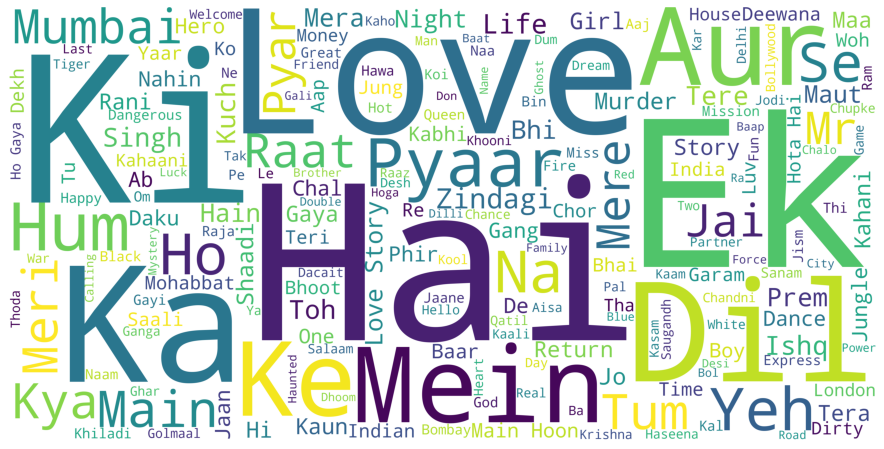

In [ ]:
from wordcloud import WordCloud, STOPWORDS
df['Title'] = df['Title'].astype('str')
title_corpus = ' '.join(df['Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#df = df.astype({'Actors1': 'str', 'Actors2': 'str','Actors1': 'str'})

In [ ]:
df.head()

,Actors1,Actors2,Actors3,Actors4,Actors5,Actors6,Budget,Dialogue,Director,First_Day,First_Week,First_Weekend,Genre,India_Gross,Lyrics,Music,Producer,Production_Banner,Release_Date,Runtime,Screenplay,Screens,Story,Title,profit
0,Rishi Kapoor,Sanjay Dutt,Hrithik Roshan,Priyanka Chopra,Om Puri,Zarina Wahab,710000000,"Karan Malhotra,Ila Bedi Dutta",Karan Malhotra,217200000,813700000,457400000,Action,1639800000,Amitabh Bhattacharya,Ajay - Atul,"Karan Johar,Hiroo Johar",Dharma Productions Pvt. Ltd.,2012-01-26,168,NaN,2600,Piyush Mishra,Agneepath,hit
1,Pulkit Samrat,Amita Pathak,Rajesh Bakshi,NaN,NaN,NaN,100000000,"Supavitra Babul,Gautam Mehra",Supavitra Babul,3800000,19550000,12800000,Love Story,27200000,"Aseem Ahmed Abbasi,Luv Ranjan,Kumaar",Raghav Sachar,"Abhishek Pathak,Kumar Mangat",Viacom 18 Motion Pictures,2012-04-13,130,Supavitra Babul,675,Gautam Mehra,Bittoo Boss,flop
2,Akshay Kumar,John Abraham,Rishi Kapoor,Randhir Kapoor,Mithun Chakraborty,Asin,720000000,"Sajid Khan,Tushar Hiranandani",Sajid Khan,121900000,617500000,402400000,Comedy,1537600000,Sameer,Sajid - Wajid,Sajid Nadiadwala,Eros International,2012-04-06,156,Sajid Nadiadwala,2650,Farhad - Sajid,Housefull 2,hit
3,Ajay Devgn,Kajal Aggarwal,Prakash Raj,Sonali Kulkarni,Sudhanshu Pandey,Sachin Khedekar,410000000,Yunus Sajawal,Rohit Shetty,87600000,492900000,297300000,Action,1358300000,Swanand Kirkire,Ajay - Atul,NaN,Reliance Entertainment,2011-07-22,144,Hari,2050,Farhad - Sajid,Singham,hit
4,Mithun Chakraborty,Ajay Devgn,Kareena Kapoor,Arshad Warsi,Tusshar Kapoor,Shreyas Talpade,500000000,Yunus Sajawal,Rohit Shetty,83600000,626100000,348500000,Comedy,1491200000,Kumaar,Pritam,Dillion Mehta,Shree Ashtavinayak Cinevision Ltd.,2010-11-05,141,Yunus Sajawal,1750,Farhad - Sajid,Golmaal 3,hit


In [ ]:
classification_target = 'profit'
classification_outcome = df[classification_target]

In [ ]:
def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)

In [ ]:
#!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
classification_setup = setup(data= df, target='profit',remove_outliers=True,normalize=True,normalize_method='robust',
                             high_cardinality_features=(['Actors1','Actors2','Actors3','Actors4','Actors5','Actors6','Dialogue','Director','Lyrics','Music','Producer','Production_Banner','Screenplay','Story','Title']),
                             fix_imbalance=True,silent = True,session_id = 394)

Setup Succesfully Completed!


,Description,Value
0,session_id,394
1,Target Type,Multiclass
2,Label Encoded,"avg: 0, flop: 1, hit: 2"
3,Original Data,"(2615, 25)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,19
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9390,0.0000,0.8778,0.9394,0.9389,0.8509,0.8512,1.7342
1,Extreme Gradient Boosting,0.8849,0.0000,0.7899,0.8900,0.8868,0.7241,0.7251,37.7794
2,Gradient Boosting Classifier,0.8792,0.0000,0.7773,0.8880,0.8825,0.7103,0.7118,21.9689
3,CatBoost Classifier,0.8786,0.0000,0.7475,0.8750,0.8760,0.6981,0.6995,64.7883
4,Decision Tree Classifier,0.8555,0.0000,0.7397,0.8604,0.8566,0.6523,0.6540,0.2205
5,Logistic Regression,0.8136,0.0000,0.7415,0.8542,0.8287,0.5923,0.6018,4.5948
6,SVM - Linear Kernel,0.7969,0.0000,0.6756,0.8294,0.8042,0.5395,0.5517,2.4427
7,Extra Trees Classifier,0.7969,0.0000,0.4905,0.7126,0.7429,0.3561,0.4056,2.0120
8,Ridge Classifier,0.7865,0.0000,0.5881,0.7739,0.7785,0.4525,0.4548,1.0804
9,Ada Boost Classifier,0.7733,0.0000,0.6890,0.8638,0.8008,0.5201,0.5423,3.6435


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=394, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Light Gradient Boosting Machine


In [ ]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9598,0.0000,0.9284,0.9608,0.9602,0.9026,0.9027
1,0.9540,0.0000,0.8976,0.9528,0.9527,0.8857,0.8863
2,0.9483,0.0000,0.8724,0.9472,0.9476,0.8726,0.8727
3,0.9368,0.0000,0.8701,0.9409,0.9382,0.8471,0.8476
4,0.9425,0.0000,0.8925,0.9425,0.9425,0.8597,0.8597
5,0.9368,0.0000,0.8800,0.9356,0.9361,0.8444,0.8445
6,0.9253,0.0000,0.8483,0.9221,0.9230,0.8160,0.8165
7,0.9310,0.0000,0.8655,0.9310,0.9310,0.8317,0.8317
8,0.9133,0.0000,0.8292,0.9177,0.9152,0.7911,0.7918
9,0.9422,0.0000,0.8941,0.9434,0.9428,0.8583,0.8584


In [ ]:
print(lgb)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=394, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_lgb = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9540,0.0000,0.8835,0.9527,0.9520,0.8856,0.8867
1,0.9253,0.0000,0.8425,0.9214,0.9221,0.8142,0.8151
2,0.9368,0.0000,0.8504,0.9334,0.9344,0.8414,0.8424
3,0.9138,0.0000,0.8175,0.9152,0.9144,0.7896,0.7896
4,0.8908,0.0000,0.7650,0.8863,0.8883,0.7286,0.7289
5,0.9425,0.0000,0.8959,0.9419,0.9421,0.8597,0.8598
6,0.9195,0.0000,0.8324,0.9147,0.9160,0.8001,0.8010
7,0.9138,0.0000,0.8431,0.9123,0.9129,0.7896,0.7896
8,0.8902,0.0000,0.7766,0.8926,0.8912,0.7331,0.7334
9,0.9017,0.0000,0.7915,0.8955,0.8976,0.7523,0.7532


In [ ]:
print(tuned_lgb)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=40,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=70, n_jobs=-1, num_leaves=70, objective=None,
               random_state=394, reg_alpha=0.1, reg_lambda=0.7, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


l1=plot_model(lgb)
l2=plot_model(lgb,plot='pr')
l3=plot_model(lgb,plot='confusion_matrix')
l4=plot_model(lgb,plot='error')
l5=plot_model(lgb,plot='class_report')
l6=plot_model(lgb,plot='learning')
l7=plot_model(lgb,plot='vc')
l8=plot_model(lgb,plot='feature')

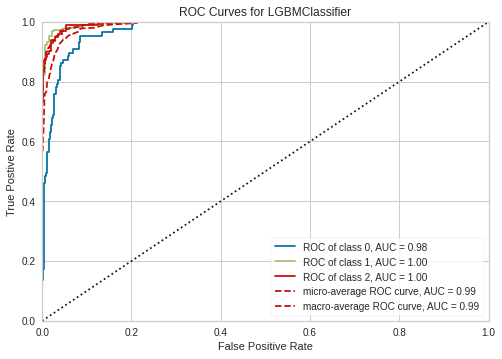

In [ ]:
l1=plot_model(tuned_lgb)

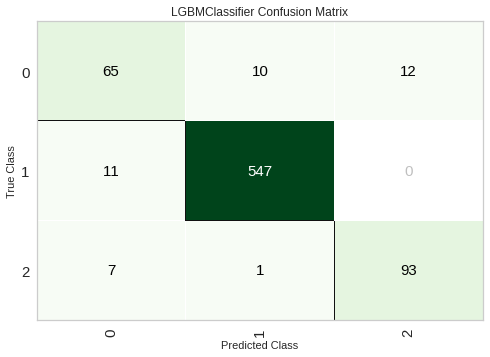

In [ ]:
l2=plot_model(tuned_lgb,plot='confusion_matrix')

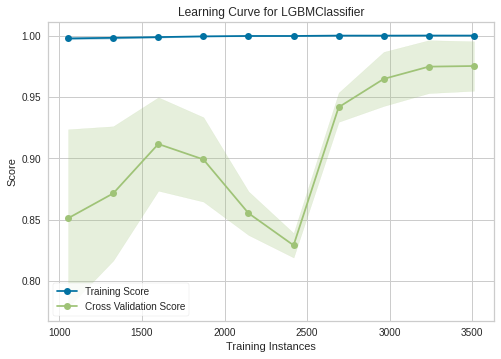

In [ ]:
l3=plot_model(tuned_lgb,plot='learning')

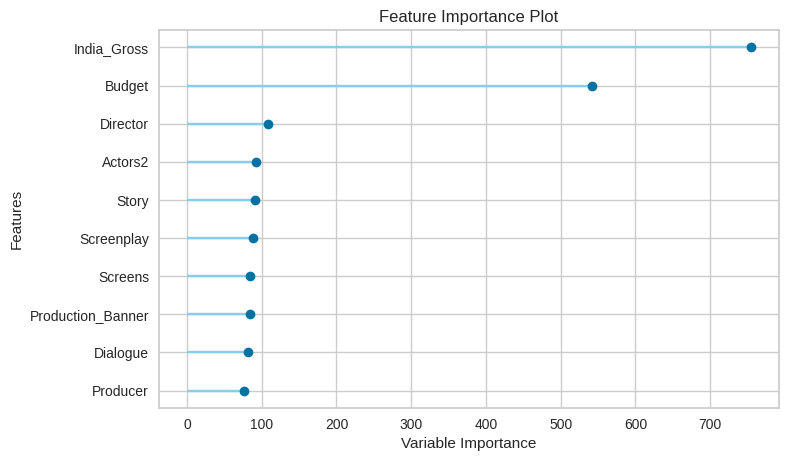

In [ ]:
l4=plot_model(tuned_lgb,plot='feature')

In [ ]:
evaluate_model(tuned_lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Extreme Gradient Boosting

In [ ]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9080,0.0000,0.7951,0.9092,0.9075,0.7717,0.7726
1,0.9253,0.0000,0.8735,0.9285,0.9266,0.8192,0.8195
2,0.8966,0.0000,0.7957,0.8966,0.8966,0.7474,0.7474
3,0.8851,0.0000,0.8188,0.9026,0.8918,0.7336,0.7369
4,0.8448,0.0000,0.7246,0.8618,0.8521,0.6373,0.6394
5,0.8908,0.0000,0.8063,0.8873,0.8887,0.7334,0.7337
6,0.8678,0.0000,0.7722,0.8750,0.8709,0.6883,0.6893
7,0.9023,0.0000,0.8366,0.9006,0.9012,0.7636,0.7638
8,0.8497,0.0000,0.7207,0.8621,0.8552,0.6443,0.6458
9,0.8786,0.0000,0.7552,0.8766,0.8770,0.7022,0.7027


In [ ]:
print(xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=394,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [ ]:
tuned_xg = tune_model(xg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8908,0.0000,0.7169,0.8795,0.8812,0.7105,0.7177
1,0.9023,0.0000,0.7814,0.8977,0.8988,0.7591,0.7599
2,0.8621,0.0000,0.6759,0.8543,0.8578,0.6570,0.6575
3,0.8851,0.0000,0.7511,0.8776,0.8797,0.7063,0.7087
4,0.8736,0.0000,0.7233,0.8680,0.8705,0.6830,0.6836
5,0.8448,0.0000,0.6729,0.8322,0.8375,0.6075,0.6090
6,0.8448,0.0000,0.6463,0.8220,0.8313,0.5928,0.5976
7,0.8678,0.0000,0.7322,0.8587,0.8625,0.6715,0.6723
8,0.8324,0.0000,0.6566,0.8319,0.8298,0.5921,0.5940
9,0.8324,0.0000,0.6306,0.8127,0.8205,0.5613,0.5645


In [ ]:
print(tuned_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=60,
              min_child_weight=2, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=394, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=0)


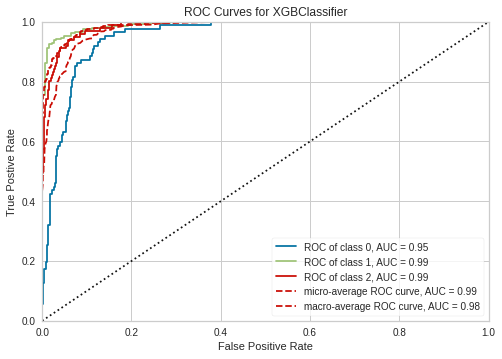

In [ ]:
x1=plot_model(tuned_xg)

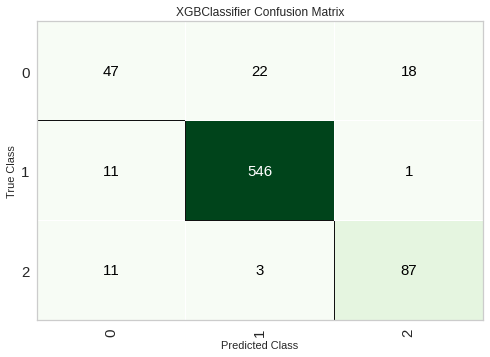

In [ ]:
x2=plot_model(tuned_xg,plot='confusion_matrix')

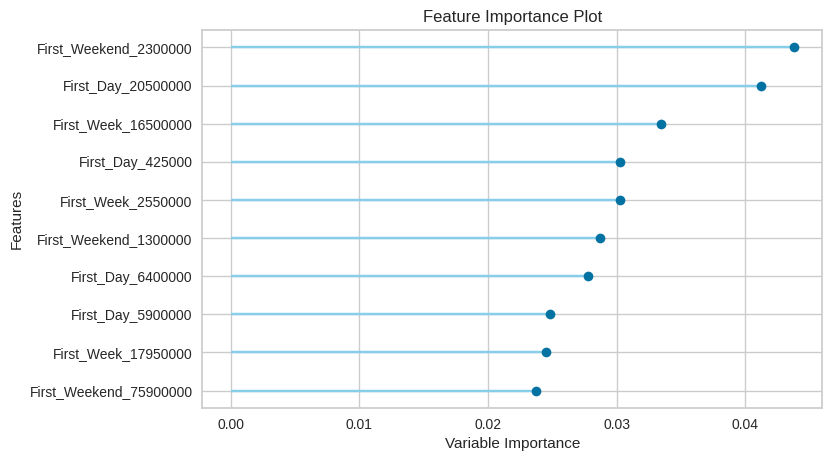

In [ ]:
x4=plot_model(tuned_xg,plot='feature')

In [ ]:
evaluate_model(tuned_xg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…